# **TUGAS AKHIR**
Pada penelitian ini akan dilakukan pencarian pengaruh penambahan regularisasi terhadap akurasi deep learning dalam deteksi penyakit diabetes retinopati (No DR - DR)

Link Dataset :
[Diabetes Retinopati](https://www.kaggle.com/competitions/diabetic-retinopathy-detection)

## Import Lib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import glob, os

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense, Conv2D, MaxPooling2D,Flatten, Activation, Add
from keras.models import Model
from keras.activations import relu
from keras.backend import sigmoid
from keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Image Data Generator

In [4]:
train_path = 'C:/Dani/Kuliah/TA/data2/train'
valid_path = 'C:/Dani/Kuliah/TA/data2/val'
test_path = 'C:/Dani/Kuliah/TA/data2/test'

In [5]:
image_size = (224,224)
batch_size = 16
class1 = ['No DR', 'DR']

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    preprocessing_function=None
)

# no dr - dr
print("Train : ")
train_generator_nodr_dr = datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class1,
    shuffle=True
)

print("Validation : ")
valid_generator_nodr_dr = datagen.flow_from_directory(
    valid_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class1,
    shuffle=True
)

print("Test : ")
test_generator_nodr_dr = datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    classes=class1,
    shuffle=True
)


No DR - DR
Train : 
Found 0 images belonging to 2 classes.
Validation : 
Found 0 images belonging to 2 classes.
Test : 
Found 0 images belonging to 2 classes.


## Development Phase : VGG19

In [6]:
input_shape = train_generator_nodr_dr.image_shape

lr = 0.0001
steps_per_epoch = 50
epochs = 10
validation_steps = 30

(224, 224, 3)


In [5]:
def show_accuracy(history, model, reg):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(model + ' ' + reg + ' Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
def show_loss(history, model, reg):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model + ' ' + reg + ' Loss')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

### Model

In [6]:
def VGG19 (input_shape) :

    x_input = Input(input_shape, name="input_layer") #VGG19 input_shape by default is (224,224,3)

    #FEATURE EXTRACTION - Convolutional Layers
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv1")(x_input)
    x = Conv2D(64, (3,3), padding="same", activation=relu, name="block1_conv2")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block1_maxpool")(x)

    x = Conv2D(128, (3,3), padding="same", activation=relu, name="block2_conv1")(x)
    x = Conv2D(128, (3,3), padding="same", activation=relu, name="block2_conv2")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block2_maxpool")(x)

    x = Conv2D(256, (3,3), padding="same", activation=relu, name="block3_conv1")(x)
    x = Conv2D(256, (3,3), padding="same", activation=relu, name="block3_conv2")(x)
    x = Conv2D(256, (3,3), padding="same", activation=relu, name="block3_conv3")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block3_maxpool")(x)

    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block4_conv1")(x)
    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block4_conv2")(x)
    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block4_conv3")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block4_pool")(x)

    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block5_conv1")(x)
    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block5_conv2")(x)
    x = Conv2D(512, (3,3), padding="same", activation=relu, name="block5_conv3")(x)
    x = MaxPooling2D((2,2), strides=(2,2), name="block5_pool")(x)

    #Make it into 1 dimension
    x = Flatten()(x)

    #CLASSIFICATION - Fully Connected Layers
    x = Dense(4096, activation=relu, name="fc1")(x) #1
    x = Dense(4096, activation=relu, name="fc2")(x) #2
    x = Dense(1, activation=sigmoid, name="predictions")(x) #3
    #n_class = number of output label

    model = Model(inputs = x_input, outputs = x, name = "VGG19")

    return model

### Compile & Train Model

In [7]:
model_VGG = VGG19(input_shape)
model_VGG.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=lr),
                metrics=['accuracy'])

In [8]:
history_VGG_nodr_dr = model_VGG.fit(
      train_generator_nodr_dr,
      steps_per_epoch = steps_per_epoch,
      epochs = epochs,
      validation_data = valid_generator_nodr_dr,
      validation_steps = validation_steps,
      verbose=1)

Epoch 1/10
50/50 [==============================] - 1798s 35s/step - loss: 0.6232 - accuracy: 0.7287 - val_loss: 0.5695 - val_accuracy: 0.7667
Epoch 2/10
50/50 [==============================] - 1758s 35s/step - loss: 0.5971 - accuracy: 0.7268 - val_loss: 0.5612 - val_accuracy: 0.7583
Epoch 3/10
50/50 [==============================] - 1707s 34s/step - loss: 0.6087 - accuracy: 0.7225 - val_loss: 0.5910 - val_accuracy: 0.7229
Epoch 4/10
50/50 [==============================] - 1624s 32s/step - loss: 0.5973 - accuracy: 0.7237 - val_loss: 0.5843 - val_accuracy: 0.7292
Epoch 5/10
50/50 [==============================] - 1697s 34s/step - loss: 0.5852 - accuracy: 0.7312 - val_loss: 0.5655 - val_accuracy: 0.7542
Epoch 6/10
50/50 [==============================] - 1864s 37s/step - loss: 0.5798 - accuracy: 0.7362 - val_loss: 0.5281 - val_accuracy: 0.7812
Epoch 7/10
50/50 [==============================] - 1827s 37s/step - loss: 0.5874 - accuracy: 0.7287 - val_loss: 0.5735 - val_accuracy: 0.7396

### Save Model

In [9]:
history_VGG_nodr_dr.model.save("VGG19.h5")

C:\Users\Cintya Aprilia Dewi\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluate

In [16]:
# loaded_vgg16 = load_model('VGG19.h5')

VGG19_loss, VGG19_accuracy = history_VGG_nodr_dr.model.evaluate(train_generator_nodr_dr, steps=50)
print("VGG19 train loss : ", VGG19_loss)
print("VGG19 train accuracy : ", VGG19_accuracy)

50/50 [==============================] - 422s 8s/step - loss: 0.6018 - accuracy: 0.7138
VGG19 train loss :  0.6017741560935974
VGG19 train accuracy :  0.7137500047683716


In [17]:
VGG19_loss, VGG19_accuracy = history_VGG_nodr_dr.model.evaluate(test_generator_nodr_dr, steps=50)
print("VGG19 test loss : ", VGG19_loss)
print("VGG19 test accuracy : ", VGG19_accuracy)

50/50 [==============================] - 439s 9s/step - loss: 0.5740 - accuracy: 0.7513
VGG16 test loss :  0.5739995241165161
VGG16 test accuracy :  0.7512500286102295


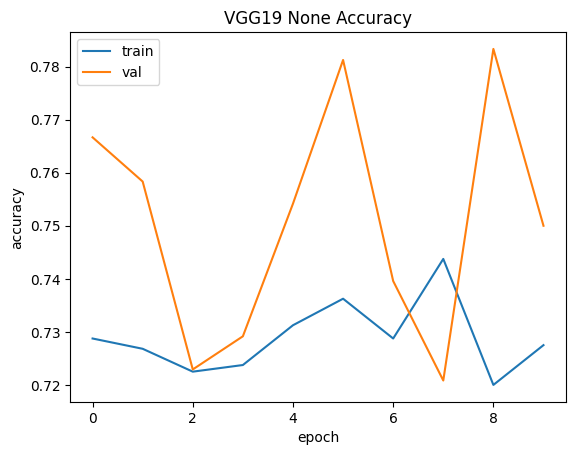

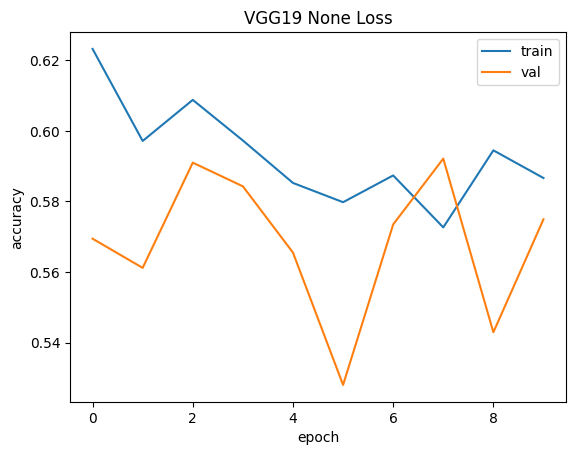

In [18]:
show_accuracy(history_VGG_nodr_dr, 'VGG19', 'None')
show_loss(history_VGG_nodr_dr, 'VGG19', 'None')

### Prediction

In [19]:
y_pred = history_VGG_nodr_dr.model.predict(test_generator_nodr_dr)

440/440 [==============================] - 3564s 8s/step


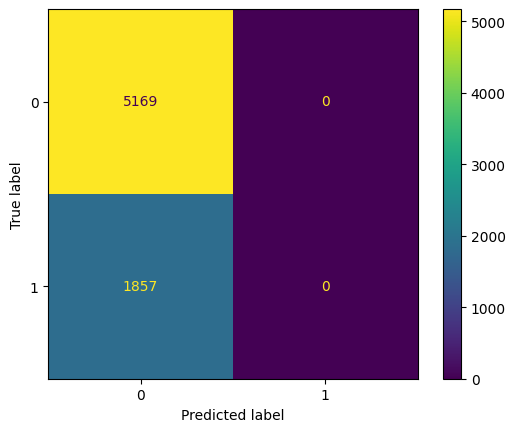

In [20]:
y_pred_class = np.argmax(y_pred, axis=1)
y_true = test_generator_nodr_dr.classes

cm = confusion_matrix(y_true, y_pred_class)
cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot()
plt.show()

## Pemanggilan Model

In [1]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

image_size = (224, 224) # Bisa kalian ganti#define input shape
labels = ['No DR', 'Proliferative DR']

In [2]:
MODEL_PATH = 'C:\Dani\Kuliah\TA\VGG19.h5'

model = load_model(MODEL_PATH, compile=False)

In [3]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    return nimg
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

### Uji 1 DR - No: 113 DR: 0

In [4]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/valid/DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    #print(label[45:-5], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 0s 447ms/step
No DR:  113
DR:  0


### Uji 2 No - No: 118 DR: 0

In [5]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/valid/No_DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    #print(label[45:-5], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 513ms/step
No DR:  118
DR:  0


### Uji 3 DR - No: 200 DR: 0

In [4]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/val/Proliferative DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 676ms/step
No DR:  200
DR:  0


### Uji 4 DR - No: 200 DR: 0

In [5]:
import glob
No_DR = 0
P_DR = 0
count = 0
train_path = 'D:/data3/data/train'

for label in glob.iglob(f'D:/data3/data/test/Proliferative DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 571ms/step
No DR:  200
DR:  0


### Uji 5 No - No: 200 DR: 0

In [8]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/val/No DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 828ms/step
No DR:  200
DR:  0


### Uji 6 No - No: 200 DR: 0

In [7]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'D:/data3/data/test/No DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 737ms/step
No DR:  200
DR:  0


### Uji 7 No - No: 200 DR: 0

In [10]:
import glob
No_DR = 0
P_DR = 0
count = 0

for label in glob.iglob(f'C:/Dani/Kuliah/TA/data6/test/No_DR/*'):
    im = Image.open(label)
    #im = cv2.imread(label)
    X = preprocess(im,image_size)
    X = reshape([X])
    y = model.predict(X)
    
    value = y[0][0]
    indx = int(value)
    
    print(label[35:-4], ' - ', labels[indx], ' - ', value)
    if indx == 0:
        No_DR += 1
    elif indx == 1:
        P_DR +=1
    count+=1
    if count == 200:
        break
    
print('No DR: ', No_DR)
print('DR: ', P_DR)

1/1 [==============================] - 1s 1s/step
01d9477b1171_png.rf.106ae9ee6cefce0575b1234ae9e33e3e  -  No DR  -  0.21298866
1/1 [==============================] - 1s 834ms/step
01f7bb8be950_png.rf.f00e239651c17fdd19e79e43f923767c  -  No DR  -  0.15765055
1/1 [==============================] - 1s 829ms/step
0212dd31f623_png.rf.028a049dec0104cc7507e305b3350ef1  -  No DR  -  0.22425373
1/1 [==============================] - 1s 666ms/step
02358b47ea89_png.rf.f2c9e8e7f05075be774dfaebd5b84e20  -  No DR  -  0.14825971
1/1 [==============================] - 1s 590ms/step
04aef84a2cc1_png.rf.8277e09e3432478ed982f918812b8468  -  No DR  -  0.21729726
1/1 [==============================] - 1s 929ms/step
054b1b305160_png.rf.6fb82a9515a2cefbb1dc7d754f5efc79  -  No DR  -  0.21487428
1/1 [==============================] - 1s 653ms/step
060e00d1e2ab_png.rf.7d0ddd2e457230c6d7cc877ee35875f5  -  No DR  -  0.19355534
1/1 [==============================] - 0s 492ms/step
0773a1c326ad_png.rf.06aeab157f536